In [1]:
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt

#Loading the dataset
print("Loading the Dataset...")
dataset = load_dataset("lukebarousse/data_jobs")
print("Dataset Loaded Successfully...")

#converting dataset to a data frame
df = dataset["train"].to_pandas()
print("Data Frame Created...")

############ Cleaning
df["job_posted_date"] = pd.to_datetime(df["job_posted_date"])
df.drop(["salary_hour_avg"], axis=1, inplace=True)
df = df[df["job_title_short"].notna()]
df = df[df["salary_year_avg"].notna()]
df["joining_month"] = df["job_posted_date"].dt.month
print("Data Cleaned...")

c:\Users\ADMIN\anaconda3\envs\pandas_prac_env\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Loading the Dataset...
Dataset Loaded Successfully...
Data Frame Created...
Data Cleaned...


In [33]:
# Lets do one thing.. Lets create a dic with keys of each month and the values would be the data frame containing joinings of only that month..

df["job_posted_month"] = df["job_posted_date"].dt.strftime("%b")
# Get all The unique months which will be the keys of our dict later
months = df["job_posted_month"].unique().tolist()

# Now lets create the dictionary which is typically of the format: {"Jan": jan_df , "Feb": feb_df ....}

months_dict = {}
for month in months:
    if month not in months_dict:
        months_dict[month] = df[df["job_posted_month"] == month]



#  We can also do the above code in a single line using dictionary comprehnsion as follow
# simple_months_dict = {x: df[df["job_posted_month"] == x] for x in months}
# simple_months_dict


                  count
job_posted_month       
Jan                2296
Mar                2204
Feb                2010


<Axes: xlabel='job_posted_month'>

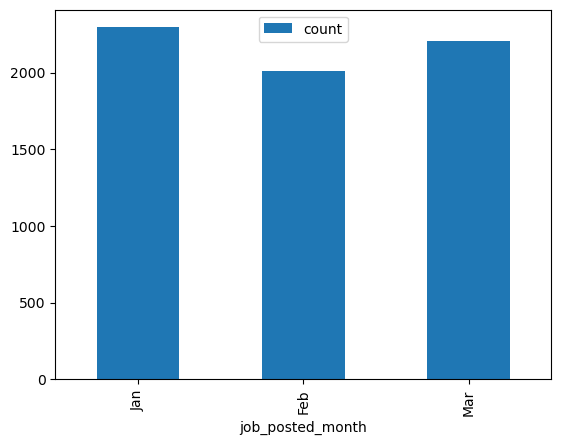

In [ ]:
# Once we have our required dictionary, we can use the concat method to see the grouped data of only say jan feb and mar as follow

concated_df = pd.concat([months_dict["Jan"],months_dict["Feb"],months_dict["Mar"]])
# concated df is the required result for this session
# lets go ahead and plot a graph of month vs size in sorted order
test_df = pd.DataFrame(concated_df["job_posted_month"].value_counts())
test_df.reset_index(inplace=True)
test_df["month_number"] = pd.to_datetime( test_df["job_posted_month"] ,format="%b").dt.month
test_df.sort_values(by="month_number", inplace=True)
test_df.drop("month_number", axis=1, inplace=True)
test_df.set_index("job_posted_month", inplace=True)
test_df.plot(kind="bar")